In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [5]:
pio.renderers.default = 'png'
pio.templates.default = "plotly_white"
pd.options.display.max_columns = None

In [6]:
file_path = "/Users/adelh/Downloads/analyst-task/data-zaplnenost-kontejneru/measurements-march.csv"
data=pd.read_csv(file_path)

In [7]:
file_path = '/Users/adelh/Downloads/analyst-task/data-zaplnenost-kontejneru/containers.geojson'
gdf = gpd.read_file(file_path)

In [8]:
data.head(3)

,id,container_id,code,percent_calculated,upturned,temperature,battery_status,measured_at,measured_at_utc,prediction,prediction_utc,firealarm
0,11678631,30133,S0133C01336,53,0,25,3.74,2019-03-30T23:09:29.000Z,2019-03-30T23:09:29.000Z,2019-05-13T12:39:17.000Z,2019-05-13T12:39:17.000Z,0
1,11677936,30133,S0133C01336,53,0,26,3.74,2019-03-30T21:09:29.000Z,2019-03-30T21:09:29.000Z,2019-05-13T12:39:17.000Z,2019-05-13T12:39:17.000Z,0
2,11676616,30133,S0133C01336,53,0,26,3.74,2019-03-30T19:09:28.000Z,2019-03-30T19:09:28.000Z,2019-05-13T12:39:17.000Z,2019-05-13T12:39:17.000Z,0


In [10]:
gdf.head(3)

,id,code,latitude,longitude,address,district,postal_code,total_volume,trash_type,prediction,bin_type,installed_at,geometry
0,29866,S0001C00011,50.088839,14.410216,Cihelná 548,None,11000,3000,plastic,NaT,Schäfer/Europa-OV,2018-12-18 00:00:00+00:00,POINT (14.41022 50.08884)
1,29867,S0001C00012,50.088839,14.410216,Cihelná 548,None,11000,3000,paper,NaT,Schäfer/Europa-OV,2018-12-18 00:00:00+00:00,POINT (14.41022 50.08884)
2,29882,S0002C00021,50.090378,14.423075,Haštalská 748,None,11000,3000,paper,NaT,Schäfer/Europa-OV,2018-12-18 00:00:00+00:00,POINT (14.42308 50.09038)


In [11]:
data = pd.merge(data, gdf[['code','trash_type','installed_at','address']], on='code', how='left')
data['installed_at'] = data['installed_at'].dt.strftime('%Y-%m')
data.head()

,id,container_id,code,percent_calculated,upturned,temperature,battery_status,measured_at,measured_at_utc,prediction,prediction_utc,firealarm,trash_type,installed_at,address
0,11678631,30133,S0133C01336,53,0,25,3.74,2019-03-30T23:09:29.000Z,2019-03-30T23:09:29.000Z,2019-05-13T12:39:17.000Z,2019-05-13T12:39:17.000Z,0,metal,2019-01,Molákova 601/2
1,11677936,30133,S0133C01336,53,0,26,3.74,2019-03-30T21:09:29.000Z,2019-03-30T21:09:29.000Z,2019-05-13T12:39:17.000Z,2019-05-13T12:39:17.000Z,0,metal,2019-01,Molákova 601/2
2,11676616,30133,S0133C01336,53,0,26,3.74,2019-03-30T19:09:28.000Z,2019-03-30T19:09:28.000Z,2019-05-13T12:39:17.000Z,2019-05-13T12:39:17.000Z,0,metal,2019-01,Molákova 601/2
3,11675949,30142,S0135C01353,32,0,15,3.77,2019-03-30T18:00:17.000Z,2019-03-30T18:00:17.000Z,NaN,NaN,0,glass_coloured,2019-01,Na Rokytce 22
4,11675836,30040,S0050C00502,64,0,14,3.60,2019-03-30T17:56:09.000Z,2019-03-30T17:56:09.000Z,2019-04-14T21:43:38.000Z,2019-04-14T21:43:38.000Z,0,plastic,2018-12,Jeseniova 1196


In [28]:
data['combined_column'] = data.apply(lambda row: f"{row['container_id']}/{row['address']}//{row['installed_at']}", axis=1)

In [29]:
glass = data.loc[lambda x: x["trash_type"].isin(['glass_white', 'glass_colored'])]

In [21]:
print("Number of containers:", glass['container_id'].nunique())

Number of containers: 62


In [22]:
print("Date range:", glass['measured_at'].min(), glass['measured_at'].max())

Date range: 2019-03-01T04:07:54.000Z 2019-03-30T17:30:56.000Z


In [23]:
print("Battety status:", glass['battery_status'].min(), glass['battery_status'].max())

Battety status: 3.6 3.82


In [24]:
print("Total number of duplicate rows:", glass.duplicated().sum())

Total number of duplicate rows: 0


In [36]:
# null
null_counts = glass.isnull().sum()
print(null_counts)

id                       0
container_id             0
code                     0
percent_calculated       0
upturned                 0
temperature              0
battery_status           0
measured_at              0
measured_at_utc          0
prediction            1428
prediction_utc        1428
firealarm                0
trash_type               0
installed_at           174
address                  0
combined_column          0
dtype: int64


In [46]:
containers_without_nulls = glass[glass['prediction'].notnull()]['combined_column'].unique()
filtered_glass = glass[glass['combined_column'].isin(containers_without_nulls)]
filtered_glass.isnull().sum()

id                      0
container_id            0
code                    0
percent_calculated      0
upturned                0
temperature             0
battery_status          0
measured_at             0
measured_at_utc         0
prediction              0
prediction_utc          0
firealarm               0
trash_type              0
installed_at          174
address                 0
combined_column         0
dtype: int64

In [77]:
containers_with_nulls_p = glass[glass['prediction'].isnull()]['combined_column'].unique()
count_containers_without_nulls_p = glass[glass['prediction'].notnull()]['combined_column'].unique()

containers_with_nulls_ins = glass[glass['installed_at'].isnull()]['combined_column'].unique()
count_containers_without_nulls_ins = glass[glass['installed_at'].notnull()]['combined_column'].unique()

In [64]:
containers_with_nulls_ins = len(containers_with_nulls_ins)
print("Number of unique containers with null values in installed_at:", containers_with_nulls_ins)

Number of unique containers with null values in installed_at: 1


In [66]:
containers_with_nulls_p = len(containers_with_nulls_p)
print("Number of unique containers with null values in prediction:", containers_with_nulls_p)


Number of unique containers with null values in prediction: 10


In [79]:
count_containers_without_nulls_pc = len(count_containers_without_nulls_p)
print("Number of unique containers without null values in prediction:", count_containers_without_nulls_pc)

Number of unique containers without null values in prediction: 52


In [81]:
containers_without_nulls_p = glass[glass['combined_column'].isin(count_containers_without_nulls_p)]


In [67]:
# upturned
glass.groupby('combined_column')['upturned'].sum()

combined_column
29791/Topolová-Jabloňová 2963/12//2018-11     2
29797/U Vršovického nádraží 0//2018-11        0
29807/Tupolevova 477//2018-11                 0
29823/Puškinovo náměstí 692//nan              0
29828/Litvínovská 288//2018-11                0
                                             ..
30159/Nám. Dr. Václava Holého //2019-01       2
30165/Františka Kadlece //2019-01             0
30171/Nad Vavrouškou Velká Skála //2019-01    1
30175/Za Poříčskou bránou //2019-01           0
30403/Pohořelec  111/25//2019-01              4
Name: upturned, Length: 62, dtype: int64

In [68]:
glass['measured_at'] = pd.to_datetime(glass['measured_at'])
glass = glass.sort_values(by=['container_id', 'measured_at'])
glass['time_difference'] = glass.groupby('container_id')['measured_at'].diff()

/var/folders/70/4lp5jlf92b54tq2xc2ym56zm0000gn/T/ipykernel_30236/3501347775.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
agg_df = glass.groupby('container_id')['time_difference'].agg(['mean', 'min', 'max']).reset_index()
agg_df['difference'] = agg_df['max'] - agg_df['mean']

In [71]:
agg_df.head(2)

,container_id,mean,min,max,difference
0,29791,0 days 06:15:44.823008849,0 days 03:08:08,0 days 16:02:28,0 days 09:46:43.176991151
1,29797,0 days 03:58:32.129213483,0 days 01:07:49,0 days 12:01:53,0 days 08:03:20.870786517


In [72]:
# measurement failures
filtered_containers = agg_df.loc[agg_df['difference'] >= pd.Timedelta(days=1), 'container_id']
filtered_containers_df = pd.merge(glass, filtered_containers, how='inner')

In [73]:
filtered_containers_df.head()

,id,container_id,code,percent_calculated,upturned,temperature,battery_status,measured_at,measured_at_utc,prediction,prediction_utc,firealarm,trash_type,installed_at,address,combined_column,time_difference
0,11176681,29922,S0022C00222,86,0,6,3.6,2019-03-01 21:50:39+00:00,2019-03-01T21:50:39.000Z,NaN,NaN,0,glass_white,2018-12,Pod kaštany 177,29922/Pod kaštany 177//2018-12,NaT
1,11187219,29922,S0022C00222,91,0,6,3.6,2019-03-02 13:53:09+00:00,2019-03-02T13:53:09.000Z,NaN,NaN,0,glass_white,2018-12,Pod kaštany 177,29922/Pod kaštany 177//2018-12,0 days 16:02:30
2,11196263,29922,S0022C00222,93,0,5,3.6,2019-03-03 05:17:57+00:00,2019-03-03T05:17:57.000Z,NaN,NaN,0,glass_white,2018-12,Pod kaštany 177,29922/Pod kaštany 177//2018-12,0 days 15:24:48
3,11244045,29922,S0022C00222,100,0,3,3.6,2019-03-06 05:29:10+00:00,2019-03-06T05:29:10.000Z,NaN,NaN,0,glass_white,2018-12,Pod kaštany 177,29922/Pod kaštany 177//2018-12,3 days 00:11:13
4,11246830,29922,S0022C00222,87,0,4,3.6,2019-03-06 09:29:47+00:00,2019-03-06T09:29:47.000Z,NaN,NaN,0,glass_white,2018-12,Pod kaštany 177,29922/Pod kaštany 177//2018-12,0 days 04:00:37


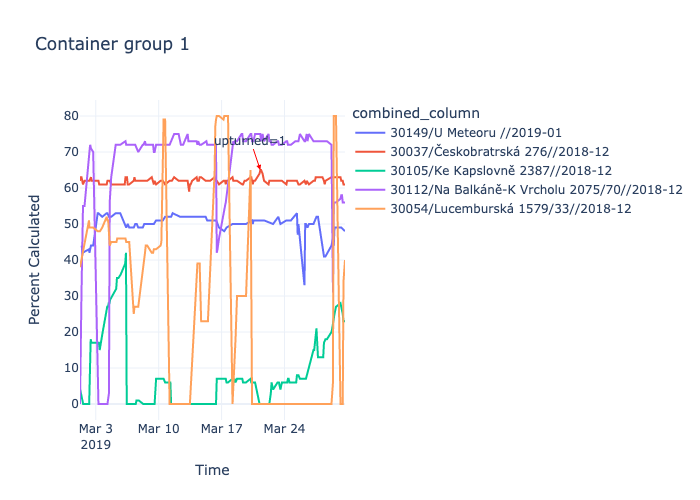

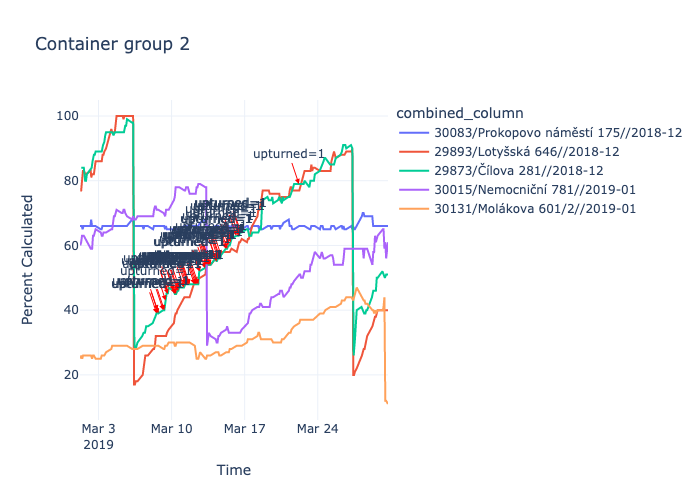

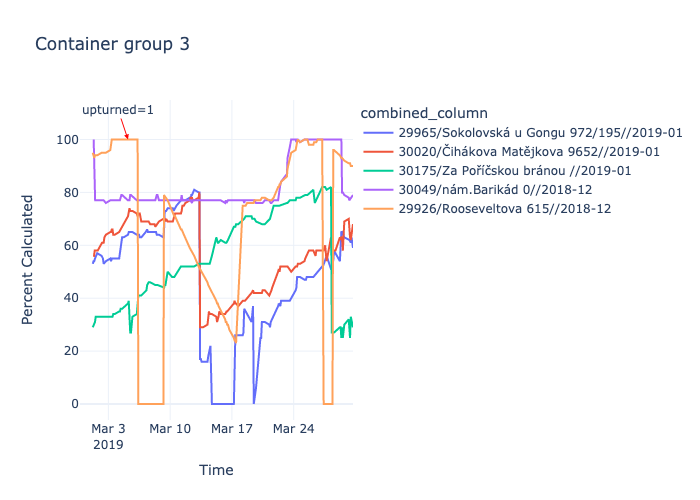

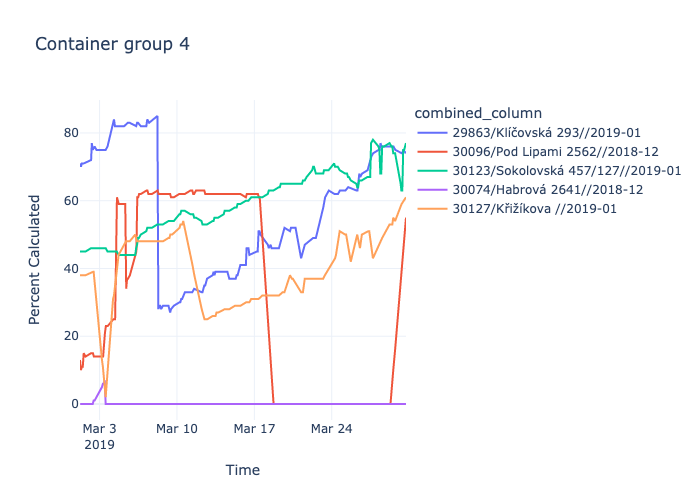

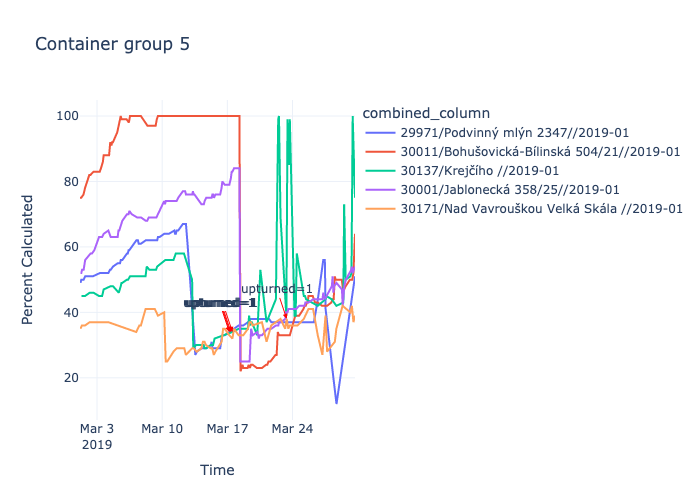

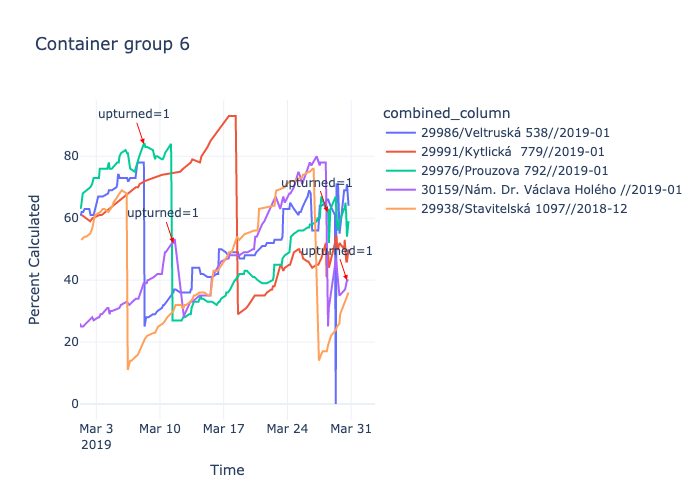

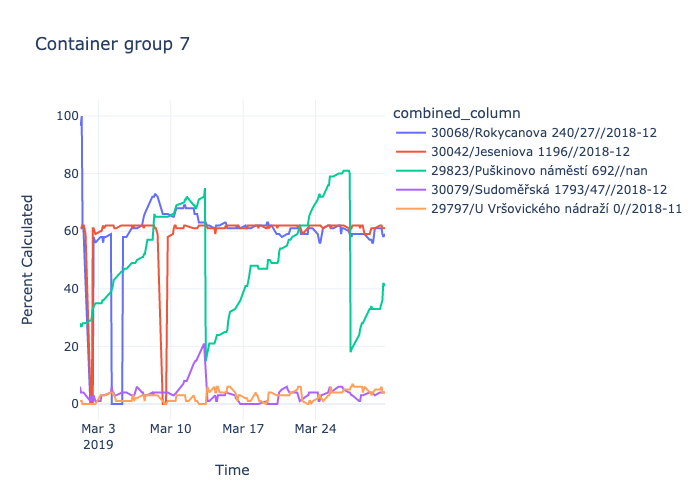

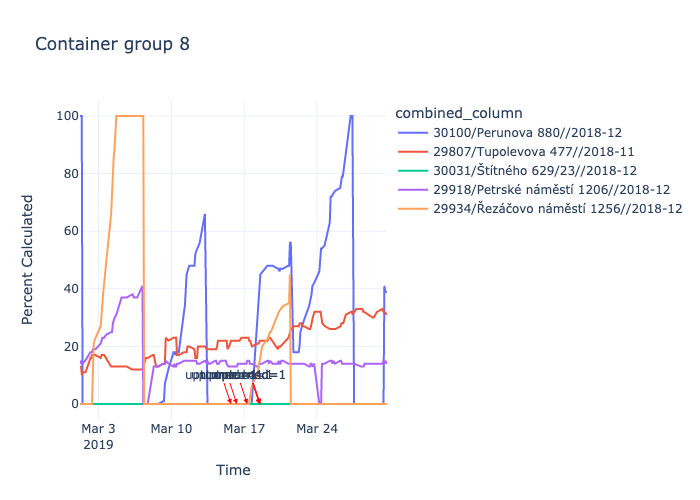

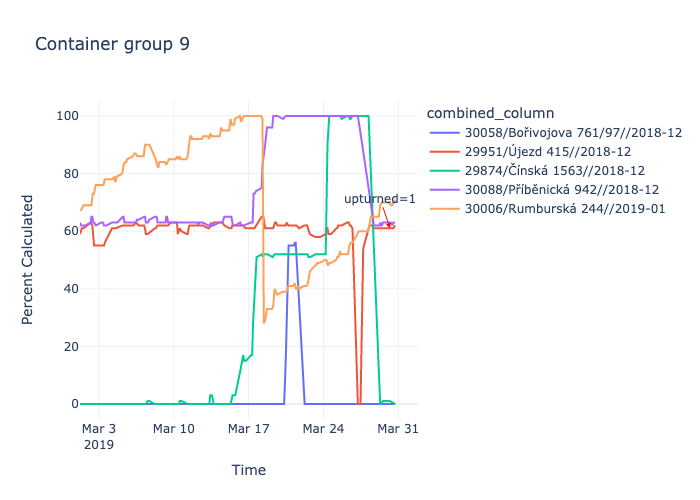

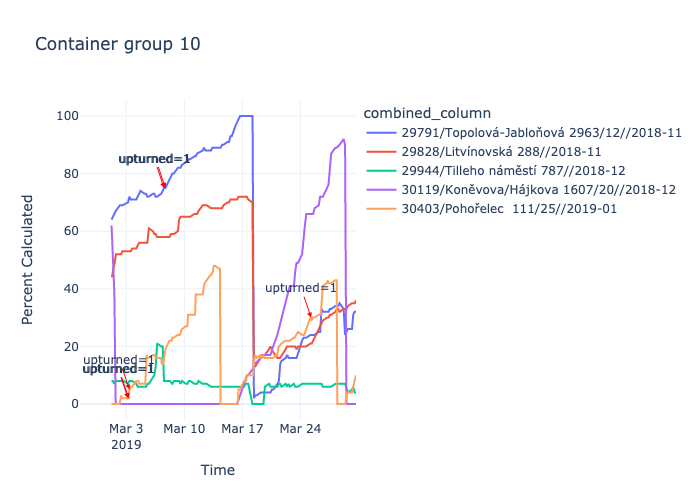

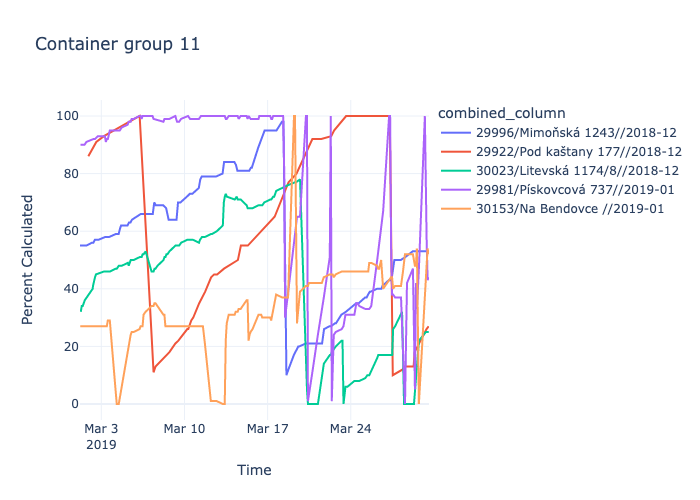

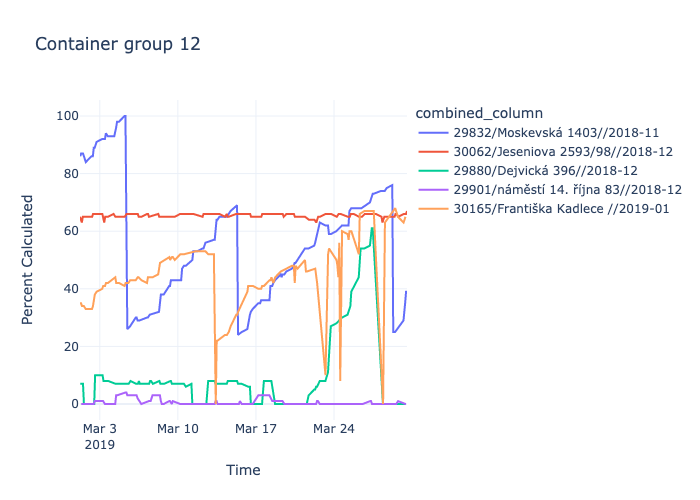

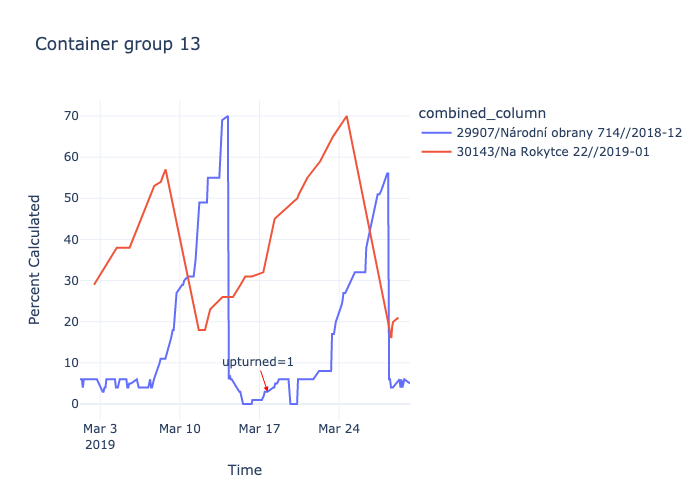

In [31]:
# data plotting
unique_container_ids = glass['combined_column'].unique()
container_id_groups = [unique_container_ids[i:i+5] for i in range(0, len(unique_container_ids), 5)]


for i, group in enumerate(container_id_groups):
    subset_df = glass[glass['combined_column'].isin(group)]

    fig = px.line(subset_df, x="measured_at", y="percent_calculated", color='combined_column', title=f"Container group {i+1}")

    upturned_data = subset_df[subset_df['upturned'] == 1]
    for _, row in upturned_data.iterrows():
        fig.add_annotation(x=row['measured_at'], y=row['percent_calculated'], text='upturned=1', showarrow=True, arrowhead=2, arrowcolor='red')


    fig.update_layout(title=f"Container group {i+1}", xaxis_title="Time", yaxis_title="Percent Calculated")
    fig.show()

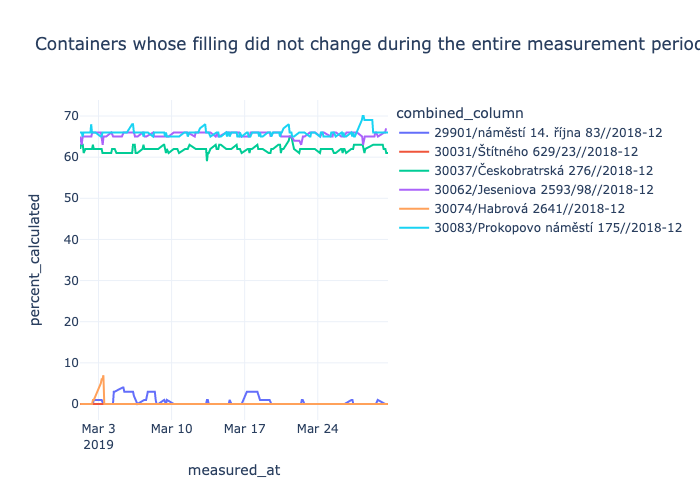

In [76]:
std_dev_by_container = glass.groupby('container_id')['percent_calculated'].std()
containers_with_min_deviation = std_dev_by_container[std_dev_by_container == std_dev_by_container.min()].index
filtered_containers = std_dev_by_container[std_dev_by_container <= 1.5].index
filtered_df = glass[glass['container_id'].isin(filtered_containers)]
fig = px.line(filtered_df, x="measured_at", y="percent_calculated", color='combined_column',title="Containers whose filling did not change during the entire measurement period")
fig.show()

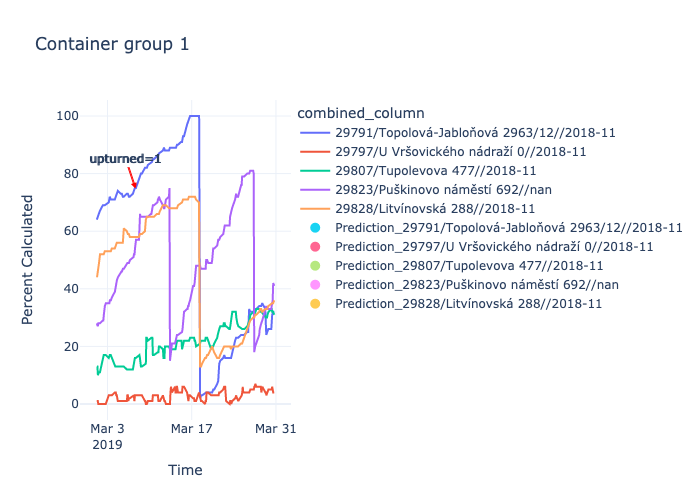

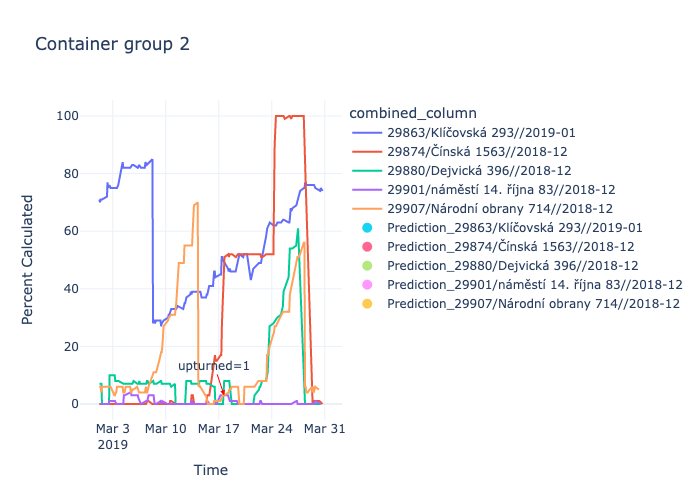

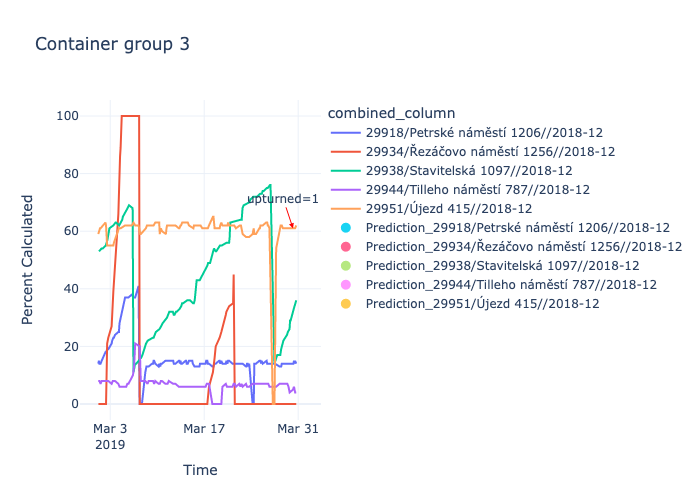

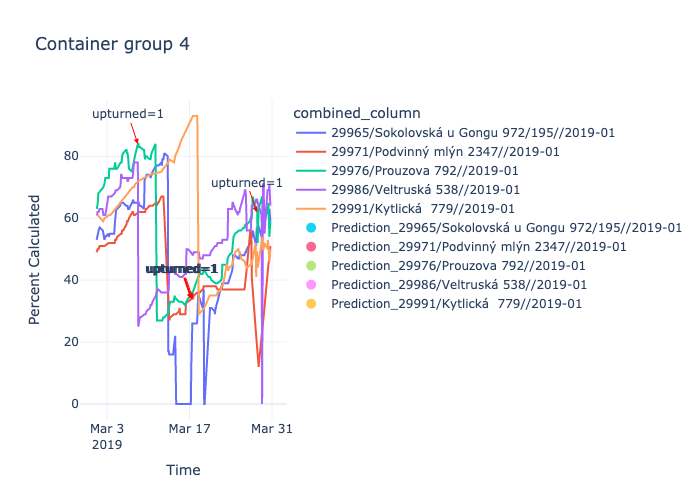

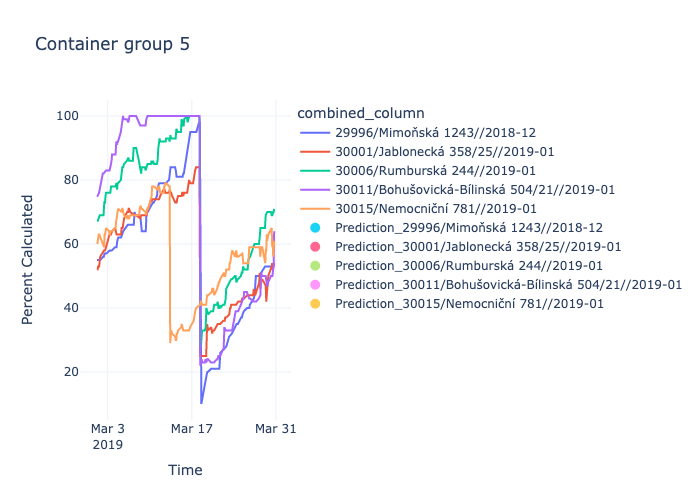

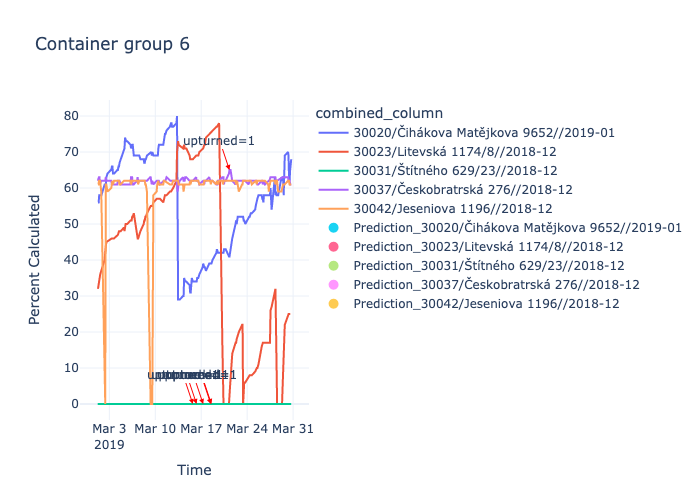

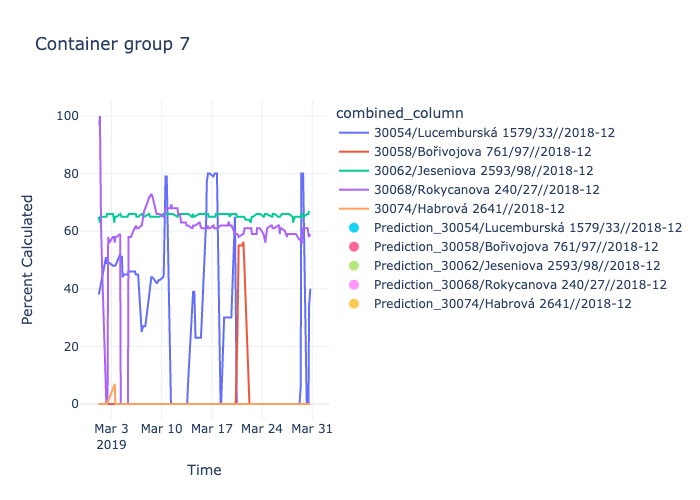

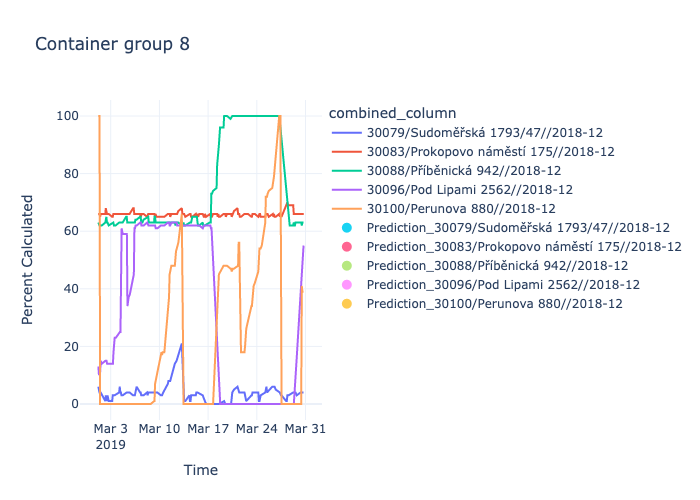

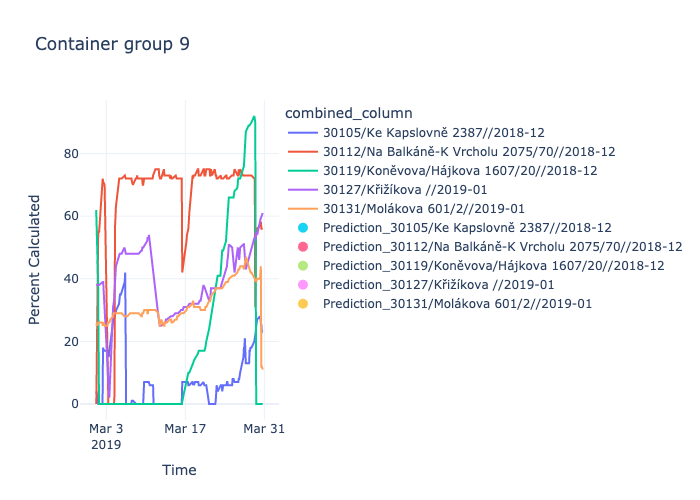

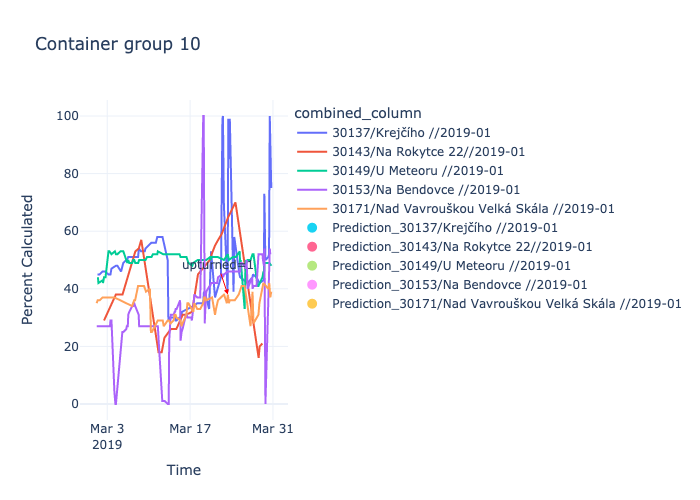

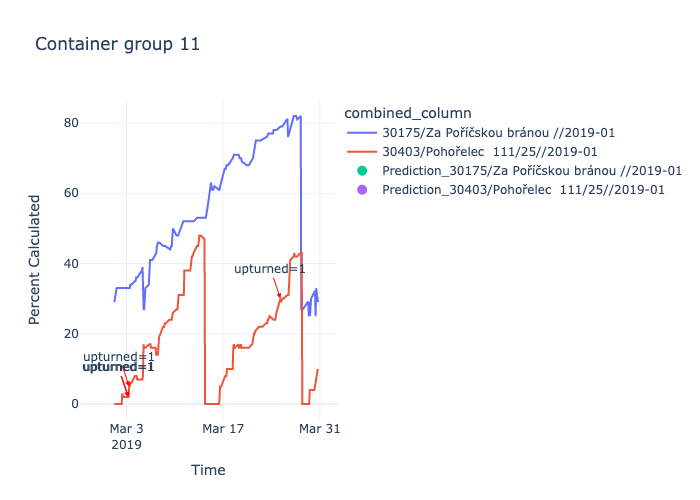

In [87]:

# data plotting prediction

for i, group in enumerate(container_id_groups):
    subset_df = containers_without_nulls_p[containers_without_nulls_p['combined_column'].isin(group)]

    fig = px.line(subset_df, x="measured_at", y="percent_calculated", color='combined_column', title=f"Container group {i+1}")

    upturned_data = subset_df[subset_df['upturned'] == 1]
    for _, row in upturned_data.iterrows():
        fig.add_annotation(x=row['measured_at'], y=row['percent_calculated'], text='upturned=1', showarrow=True, arrowhead=2, arrowcolor='red')

    # predict
    for cont_id, group_data in subset_df.groupby('combined_column'):
        fig.add_trace(go.Scatter(x=group_data['measured_at'], y=group_data['prediction'], mode='markers', name=f'Prediction_{cont_id}', marker=dict(size=10)))

    fig.update_layout(title=f"Container group {i+1}", xaxis_title="Time", yaxis_title="Percent Calculated")
    pio.write_html(fig, f"container_group_{i+1}.html")
    fig.show()



